# Peak Finding

In this notebook, you will learn about finding peaks in the values of an array.

## Imports

In [1]:
from altair import *
import numpy as np
import pandas as pd

## Peak finding

Write a function, `find_peaks`, that finds and returns the indices of the *local maxima* in a sequence of values in an array. A *local maxima* is defined as a value whose neighboring values are all smaller. Your function should:

* Properly handle local maxima at the endpoints of the input array.
* Return a Numpy array of integer indices.
* Handle any Python iterable as input.

In [2]:
def find_peaks(a):
    """Find the indices of the local maxima in a sequence."""
    a_diff = np.full(len(a), np.inf)
    a_rev_diff = np.full(len(a), np.inf)
    
    for index in range(len(a) - 1):
        a_diff[index] = a[index] - a[index + 1]
        a_rev_diff[index + 1] = a[index + 1] - a[index]

    indices = np.where(np.logical_and(a_diff > 0, a_rev_diff > 0))[0]
    return indices

In [3]:
p1 = find_peaks([2,0,1,0,2,0,1])
assert np.allclose(p1, np.array([0,2,4,6]))
p2 = find_peaks(np.array([0,1,2,3]))
assert np.allclose(p2, np.array([3]))
p3 = find_peaks([3,2,1,0])
assert np.allclose(p3, np.array([0]))

Here is a string with the first 10000 digits of $\pi$ (after the decimal):

In [4]:
from sympy import pi, N
pi_digits_str = str(N(pi, 10001))[2:]
print(pi_digits_str[0:100]+'...')

1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679...


Write code to perform the following:

* Convert that string to a Numpy array of integers.
* Find the indices of the local maxima in the digits of $\pi$.
* Use `np.diff` to find the distances between consequtive local maxima.
* Save the result in a Pandas `DataFrame` with a column name of `Distance`.

In [5]:
digits = np.array(list(map(lambda x: int(x), list(pi_digits_str))))
local_maxima = find_peaks(digits)
df = pd.DataFrame({'Distance': np.diff(local_maxima)})

In [6]:
len(df)

2898

In [7]:
assert type(df)==pd.DataFrame
assert df.columns[0]=='Distance'
assert len(df)==2898
assert df['Distance'].dtype==int

Make a histogram of the `Distance` column using Altair:

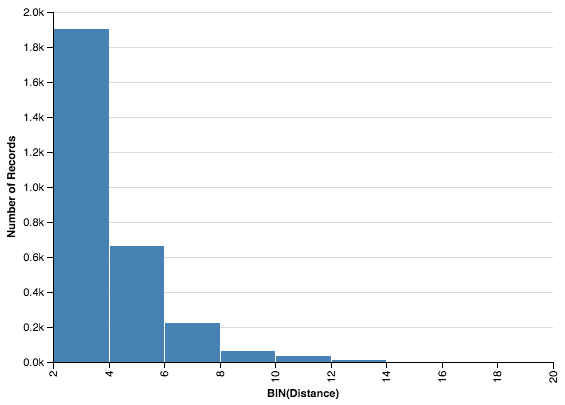

In [8]:
Chart(df).mark_bar().encode(
    X('Distance', bin=True),
    Y('count(*):Q')
)